In [52]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from IPython import embed
import time
import pandas as pd


In [239]:
# /home/lupum/NPI_ANALISE/pag20171.csv
dfTeste = pd.read_csv('/home/lupum/NPI_ANALISE/pag20171SEMVALOR.csv', delimiter=",", encoding="UTF-8", low_memory=False,
    quoting=3, na_filter=True, keep_default_na=False, error_bad_lines=False, na_values=[""])


In [232]:
def _get_init_centers(n_clusters, n_samples):
    '''return random points as initial centers'''
    init_ids = []
    while len(init_ids) < n_clusters:
        _ = np.random.randint(0,n_samples)
        if not _ in init_ids:
            init_ids.append(_)
    return init_ids

def _get_distance(data1, data2):
    '''example distance function'''
#     return np.sqrt(np.sum((data1 - data2)**2))
    xa = np.array(a)
    xb = np.array(b)
    intersection = np.intersect1d(xa, xb)
    union = np.union1d(xa, xb)       
    jaccard = len( intersection) 
    return 1- jaccard / len(union)

def _get_cost(X, centers_id, dist_func):
    '''return total cost and cost of each cluster'''
    st = time.time()
    dist_mat = np.zeros((len(X),len(centers_id)))
    # compute distance matrix
    for j in range(len(centers_id)):
        center = X[centers_id[j],:]
        for i in range(len(X)):
            if i == centers_id[j]:
                dist_mat[i,j] = 0.
            else:
                dist_mat[i,j] = dist_func(X[i,:], center)
#     print ('cost ', -st+time.time())
    mask = np.argmin(dist_mat,axis=1)
    members = np.zeros(len(X))
    costs = np.zeros(len(centers_id))
    for i in range(len(centers_id)):
        mem_id = np.where(mask==i)
        members[mem_id] = i
        costs[i] = np.sum(dist_mat[mem_id,i])
    return members, costs, np.sum(costs), dist_mat

def _kmedoids_run(X, n_clusters, dist_func, max_iter=1, tol=0.0001, verbose=True):
# def _kmedoids_run(X, n_clusters, dist_func, max_iter=1000, tol=0.001, verbose=True):
    '''run algorithm return centers, members, and etc.'''
    # Get initial centers
    n_samples, n_features = X.shape
    init_ids = _get_init_centers(n_clusters,n_samples)
    if verbose:
        print ('Initial centers are ', init_ids)
    centers = init_ids
    members, costs, tot_cost, dist_mat = _get_cost(X, init_ids,dist_func)
    cc,SWAPED = 0, True
    while True:
        SWAPED = False
        for i in range(n_samples):
            if not i in centers:
                for j in range(len(centers)):
                    centers_ = deepcopy(centers)
                    centers_[j] = i
                    members_, costs_, tot_cost_, dist_mat_ = _get_cost(X, centers_,dist_func)
                    if tot_cost_-tot_cost < tol:
                        members, costs, tot_cost, dist_mat = members_, costs_, tot_cost_, dist_mat_
                        centers = centers_
                        SWAPED = True
                        if verbose:
                            print ('Change centers to ', centers)
        if cc > max_iter:
            if verbose:
                print ('End Searching by reaching maximum iteration', max_iter)
            break
        if not SWAPED:
            if verbose:
                print ('End Searching by no swaps')
            break
        cc += 1
    return centers,members, costs, tot_cost, dist_mat

class KMedoids(object):
    '''
    Main API of KMedoids Clustering
    Parameters
    --------
        n_clusters: number of clusters
        dist_func : distance function
        max_iter: maximum number of iterations
        tol: tolerance
    Attributes
    --------
        labels_    :  cluster labels for each data item
        centers_   :  cluster centers id
        costs_     :  array of costs for each cluster
        n_iter_    :  number of iterations for the best trail
    Methods
    -------
        fit(X): fit the model
            - X: 2-D numpy array, size = (n_sample, n_features)
        predict(X): predict cluster id given a test dataset.
    '''
#    def __init__(self, n_clusters, dist_func=_get_distance, max_iter=10000, tol=0.0001):
    def __init__(self, n_clusters, dist_func=_get_distance, max_iter=1, tol=0.0001):
        self.n_clusters = n_clusters
        self.dist_func = dist_func
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X,plotit=True, verbose=True):
        centers,members, costs,tot_cost, dist_mat = _kmedoids_run(
                X,self.n_clusters, self.dist_func, max_iter=self.max_iter, tol=self.tol,verbose=verbose)
        if plotit:
            fig, ax = plt.subplots(1,1)
            colors = ['b','g','r','c','m','y','k']
            if self.n_clusters > len(colors):
                raise ValueError('we need more colors')
            
            for i in range(len(centers)):
                X_c = X[members==i,:]
#                 print(X_c) # array X
                ax.scatter(X_c[:,0],X_c[:,1],c=colors[i],alpha=0.5,s=30)
                ax.scatter(X[centers[i],0],X[centers[i],1],c=colors[i],alpha=1., s=250,marker='*')
        return

    def predict(self,X):
        raise NotImplementedError()

    def details(self, X, verbose=True):
        centers,members, costs,tot_cost, dist_mat = _kmedoids_run(
        X,self.n_clusters, self.dist_func, max_iter=self.max_iter, tol=self.tol,verbose=verbose)
        print('centers ',centers)
        print('members ',members)
        print('total costs ',tot_cost)
        print('costs ',costs)
        print('dist ',dist_mat)

#     How to identify elements in clusters and interpret clusters
#     def clustersElements(self, verbose=True):
        


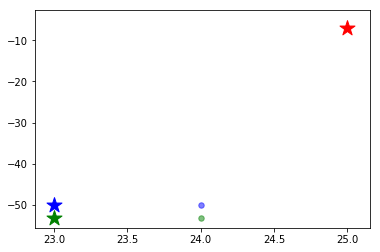

centers  [3, 4, 6]
members  [ 1.  0.  2.  0.  1.  0.  2.  1.]
total costs  2.66666666667
costs  [ 1.08333333  1.08333333  0.5       ]
dist  [[ 0.75        0.33333333  1.        ]
 [ 0.75        1.          1.        ]
 [ 0.75        0.75        0.5       ]
 [ 0.          0.66666667  1.        ]
 [ 0.66666667  0.          1.        ]
 [ 0.33333333  0.75        0.8       ]
 [ 1.          1.          0.        ]
 [ 1.          0.75        0.8       ]]


In [237]:
#from k_medoids import KMedoids
import numpy as np
import matplotlib.pyplot as plt

def example_distance_func2(a,b):
        xa = np.array(a)
        xb = np.array(b)
        intersection = np.intersect1d(xa, xb)
        union = np.union1d(xa, xb)       
        jaccard = len( intersection) / len(union)
        return 1-jaccard

def example_distance_func(data1, data2):
    '''example distance function'''
    return np.sqrt(np.sum((data1 - data2)**2))

if __name__ == '__main__':
#     X = np.random.normal(0,3,(10,2))
#     X = np.random.normal(size=(20, 3))
#     X = np.array([
#         [56000, 56202, 275068, 3, 33, 15, 122, 2116, 9296295000160,0.166667],
#         [56000,56202,275068,3,33,15,122, 2116,9296295000160,0.166667],
#         [56000,56202,275068,3,33,15,122, 2116,11092210709,0.166667],
#         [56000,56202,275068,3,33,15,122, 2116,25863584734,0.333333],
#         [56000,56202,275068,3,33,15,122, 2116,25863584734,0.333333],
#         [56000,	56202,	275068,	3,	33,	15,	122,	2116,	46982558720,	0.333333],
#         [56000,	56202,	275068,	3,	33,	15,	122,	2116,	60145269787,	0.333333],
#         [56000,	56202,	275068,	3,	33,	15,	122,	2116,	65147235434,	0.333333],
#         [56000,	56202,	275068,	3,	33,	15,	453,	2116,	352294000200,	0.166667],
#         [56000,	56202,	275068,	3,	33,	15,	453,	2116,	352294000200,	0.166667]

#     ])

#     print(X[0], X[3], example_distance_func2(X[0], X[3]))
    n = 624737 
#     dftoa =dfTeste.iloc[:,1:].values
# teste
    X = np.array([
       [ '23', '-50',  '63'],
       [ '24', '-53',  '63'],
       [ '25', '-7',  '23'],
       [ '23', '-53',  '23'],
       [ '23', '-50',  '23'],
       [ '23', '-53',  '53'],
       [ '25', '-7',  '53'],
       [ '24', '-50',  '53']        
    ])

    model = KMedoids(n_clusters=3, dist_func=example_distance_func2)
    model.fit(X, plotit=True, verbose=False)

#     model.fit(dfTeste, plotit=True, verbose=False)
    plt.show()
    model.details(X, verbose=False)


In [241]:
# Total cost: somatório dos custos dos cluster
# Costs: custo de cada cluster
# Centers elementos centróids ex: [3,2] elemento na posição 4, 3 são centróids.

# Dist: matriz de distância : 0 significa que é o próprio centroid comparado com ele mesmo,
#       1 significa que são totalmente discimilares [1,2,3] [4,5,6] = 0 de similaridade e 1 de distância. 
dfTeste.head(3)

,Código Órgão Superior,Código Órgão,Código Unidade Gestora,Código Grupo Despesa,Código Elemento Despesa,Código Função,Código Subfunção,Código Programa,Código Favorecido,valor_categorizado
0,56000,56202,275068,3,33,15,122,2116,9296295000160,0.166667
1,56000,56202,275068,3,33,15,122,2116,9296295000160,0.166667
2,56000,56202,275068,3,33,15,122,2116,11092210709,0.166667


In [242]:
dfTeste.columns

Index(['Código Órgão Superior', 'Código Órgão', 'Código Unidade Gestora',
       'Código Grupo Despesa', 'Código Elemento Despesa', 'Código Função',
       'Código Subfunção', 'Código Programa', 'Código Favorecido',
       'valor_categorizado'],
      dtype='object')

In [243]:
dfTeste.dtypes

Código Órgão Superior        int64
Código Órgão                 int64
Código Unidade Gestora       int64
Código Grupo Despesa         int64
Código Elemento Despesa      int64
Código Função                int64
Código Subfunção             int64
Código Programa              int64
Código Favorecido            int64
valor_categorizado         float64
dtype: object

In [244]:
dfTeste.shape

(737, 10)